# 아디다스 판매데이터 분석 프로젝트

In [71]:
import pandas as pd
import numpy as np
adidas = pd.read_csv("https://raw.githubusercontent.com/myoh0623/dataset/refs/heads/main/adidas_us_sales_datasets.csv", encoding='utf-8')

In [72]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,01-03-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,01-04-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,01-05-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [73]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## 데이터 타입 변환

- Retailer ID 는 고유한 아이디값이므로 굳이 숫자로 표현할 이유가 없다. >> string 으로 변경

- Invoice Date 날짜 이므로 >> Date 타입으로 변경

- Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin 등은 판매량, 판매금약, 영업이익 같은 숫자로 표현되어야 결과값에 도출이 편하므로 >> 모두 float 실수형으로 변경



In [74]:
# 앞에 $ 표시 없애주어야 함
adidas['Price per Unit'].head()

0    $50.00 
1    $50.00 
2    $40.00 
3    $45.00 
4    $60.00 
Name: Price per Unit, dtype: object

In [75]:
import re
adidas['Price per Unit'] = adidas['Price per Unit'].astype(str).str.replace('[$%,]', '', regex=True).astype(float)
adidas['Units Sold'] = adidas['Units Sold'].astype(str).str.replace('[$%,]', '', regex=True).astype(float)
adidas['Total Sales'] = adidas['Total Sales'].astype(str).str.replace('[$%,]', '', regex=True).astype(float)
adidas['Operating Profit'] = adidas['Operating Profit'].astype(str).str.replace('[$%,]', '', regex=True).astype(float)
adidas['Operating Margin'] = adidas['Operating Margin'].astype(str).str.replace('[$%,]', '', regex=True).astype(float)


In [76]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store


- Operating Margin 은 % 였으므로 영업이익을 말하는 수치이기 때문에 0.01을 곱해주어야 한다. 백분율이기 때문


In [77]:
adidas['Operating Profit_rate'] = adidas['Operating Margin'] * 0.01
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Profit_rate
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.3


- 날짜 형태변환

In [78]:
# 원본 복사
dates = adidas['Invoice Date']

# 첫 번째 형식: %d-%m-%Y
parsed1 = pd.to_datetime(dates, format="%d-%m-%Y", errors='coerce')

# 두 번째 형식: %m/%d/%Y
parsed2 = pd.to_datetime(dates, format="%m/%d/%Y", errors='coerce')

# 두 결과 중 하나라도 값이 있으면 선택
adidas['Invoice Date'] = parsed1.fillna(parsed2)

In [79]:
adidas['year'] = adidas['Invoice Date'].dt.year
adidas['month'] = adidas['Invoice Date'].dt.month

In [80]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   int64         
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

- 문자를 숫자로 변환

In [81]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

In [82]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

- 결측치 처리

In [83]:
adidas.isnull().sum() # 없음

Retailer                 0
Retailer ID              0
Invoice Date             0
Region                   0
State                    0
City                     0
Product                  0
Price per Unit           0
Units Sold               0
Total Sales              0
Operating Profit         0
Operating Margin         0
Sales Method             0
Operating Profit_rate    0
year                     0
month                    0
dtype: int64

# 데이터 분석 : 판매량 분석

## 월별 판매량 분석

In [84]:
adidas.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating Profit_rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-23 03:17:54.626865664,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.883603
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-03-05 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,4.000000
50%,2021-06-17 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,7.000000
75%,2021-10-03 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,10.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.393912


### 월별 판매량 그래프

<Axes: xlabel='year,month'>

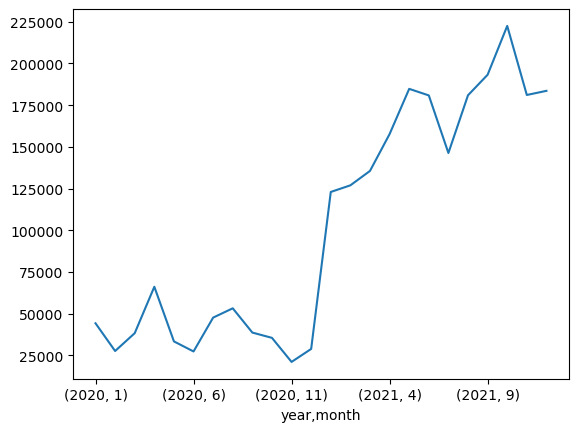

In [85]:
# 2020년 12월과 2021년 1월 사이에 판매량 급증
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

In [86]:
adidas.groupby(['year', 'month'])['Units Sold'].sum()

year  month
2020  1         44261.0
      2         27646.0
      3         38347.0
      4         66157.0
      5         33406.0
      6         27379.0
      7         47676.0
      8         53242.0
      9         38695.0
      10        35533.0
      11        21108.0
      12        28899.0
2021  1        122978.0
      2        126959.0
      3        135586.0
      4        157671.0
      5        184776.0
      6        180847.0
      7        146336.0
      8        180938.0
      9        193230.0
      10       222498.0
      11       181111.0
      12       183582.0
Name: Units Sold, dtype: float64

In [87]:
adidas.pivot_table(index = 'year', columns = 'month', values = 'Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,44261.0,27646.0,38347.0,66157.0,33406.0,27379.0,47676.0,53242.0,38695.0,35533.0,21108.0,28899.0
2021,122978.0,126959.0,135586.0,157671.0,184776.0,180847.0,146336.0,180938.0,193230.0,222498.0,181111.0,183582.0


### 소매업체별 분석

In [88]:
adidas.pivot_table(index = ['year', 'month'] , columns = 'Retailer', values = 'Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      20963.0      NaN         2302.0   3180.0    17816.0
     2          NaN       3333.0      NaN         1988.0   2614.0    19711.0
     3          NaN      16436.0      NaN         1867.0   2979.0    17065.0
     4          NaN       7961.0      NaN         1828.0  25151.0    31217.0
     5          NaN       7093.0      NaN         6870.0   2937.0    16506.0
     6          NaN       6632.0      NaN         2464.0   2749.0    15534.0
     7          NaN       6148.0      NaN        17598.0   4519.0    19411.0
     8          NaN      15654.0      NaN         2137.0  27019.0     8432.0
     9          NaN      10051.0      NaN         8149.0   5273.0    15222.0
     10         NaN       9853.0      NaN         1063.0  17989.0     6628.0
     11         NaN       8988.0      NaN            NaN   2616.0     9504.0
     12         NaN       7192.0   2214.0            NaN   2772.0    16721.0
2021 1      13200.0      22052.0  24670.0        23979.0      NaN    39077.0
     2      11431.0      20412.0  21558.0        45485.0   1617.0    26456.0
     3       6969.0      21049.0  17606.0        58666.0   3409.0    27887.0
     4       6728.0      29778.0  28674.0        61697.0   6784.0    24010.0
     5       8759.0      60473.0  27749.0        48654.0   8007.0    31134.0
     6       9772.0      77642.0  20220.0        30369.0  10949.0    31895.0
     7      10573.0      59577.0  13762.0        22946.0  16342.0    23136.0
     8       9641.0      31895.0  21683.0        59990.0  16233.0    41496.0
     9      26905.0      33862.0  10276.0        69509.0  13921.0    38757.0
     10     40682.0      40144.0  32293.0        31850.0  17945.0    59584.0
     11     32282.0      37672.0  27186.0        24439.0   8668.0    50864.0
     12     21048.0      49509.0  39484.0        33790.0   2552.0    37199.0

<Axes: xlabel='year,month'>

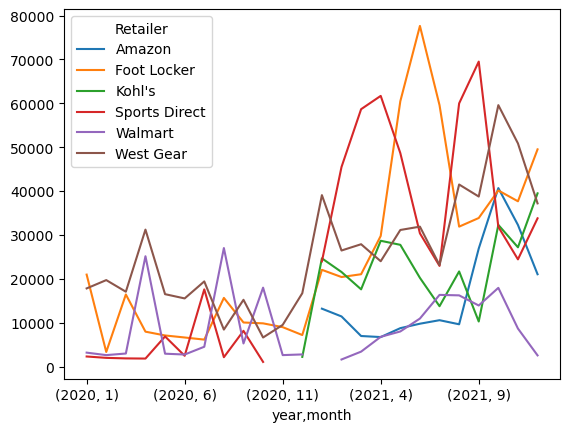

In [89]:
adidas.pivot_table(index = ['year', 'month'] , columns = 'Retailer', values = 'Units Sold', aggfunc='sum').plot.line()

In [90]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')
# 소매점 별 매장 개수

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


- 월별로 상점의 개수의 변화를 알아보자
- 판매량 변화로 인해 상점의 갯수도 늘어날수 있다. 

In [91]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])

In [92]:
df

,Retailer,Retailer ID,year,month
1168,Amazon,1185732,2021,1
1169,Amazon,1185732,2021,2
1170,Amazon,1185732,2021,3
1171,Amazon,1185732,2021,4
1172,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [93]:
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count')

Retailer ID
year month             
2020 1                6
     2                6
     3                6
     4                7
     5                6
     6                6
     7                7
     8                6
     9                6
     10               5
     11               4
     12               5
2021 1               13
     2               13
     3               12
     4               15
     5               14
     6               16
     7               14
     8               17
     9               14
     10              17
     11              15
     12              15

<Axes: xlabel='year,month'>

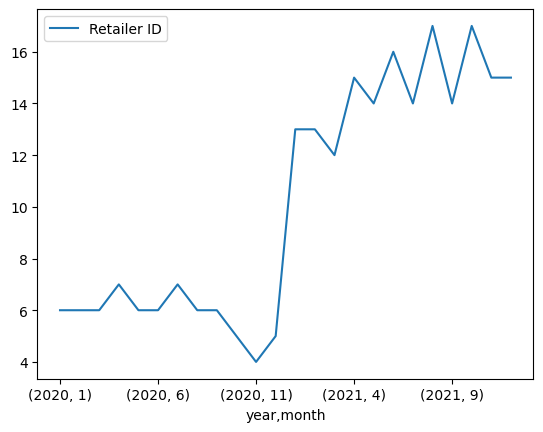

In [94]:
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count').plot.line()

- 소매점별 월별 매장 개수 증가

In [95]:
df.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Retailer ID', aggfunc = 'count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            2.0      2.0        1.0
     2         NaN          1.0     NaN            2.0      2.0        1.0
     3         NaN          1.0     NaN            2.0      2.0        1.0
     4         NaN          1.0     NaN            2.0      2.0        2.0
     5         NaN          1.0     NaN            2.0      2.0        1.0
     6         NaN          1.0     NaN            2.0      2.0        1.0
     7         NaN          1.0     NaN            2.0      2.0        2.0
     8         NaN          1.0     NaN            2.0      1.0        2.0
     9         NaN          1.0     NaN            2.0      1.0        2.0
     10        NaN          1.0     NaN            1.0      1.0        2.0
     11        NaN          1.0     NaN            NaN      1.0        2.0
     12        NaN          1.0     1.0            NaN      1.0        2.0
2021 1         1.0          2.0     4.0            3.0      NaN        3.0
     2         1.0          2.0     3.0            3.0      1.0        3.0
     3         1.0          2.0     2.0            3.0      1.0        3.0
     4         1.0          3.0     3.0            3.0      2.0        3.0
     5         1.0          3.0     2.0            3.0      2.0        3.0
     6         1.0          3.0     4.0            3.0      2.0        3.0
     7         1.0          2.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     4.0            3.0      3.0        3.0
     9         1.0          2.0     2.0            3.0      3.0        3.0
     10        1.0          3.0     4.0            3.0      3.0        3.0
     11        1.0          3.0     4.0            3.0      1.0        3.0
     12        1.0          3.0     4.0            3.0      1.0        3.0

### 소매점 별 월별 매장 개수 증감소 그래프

<Axes: xlabel='year,month'>

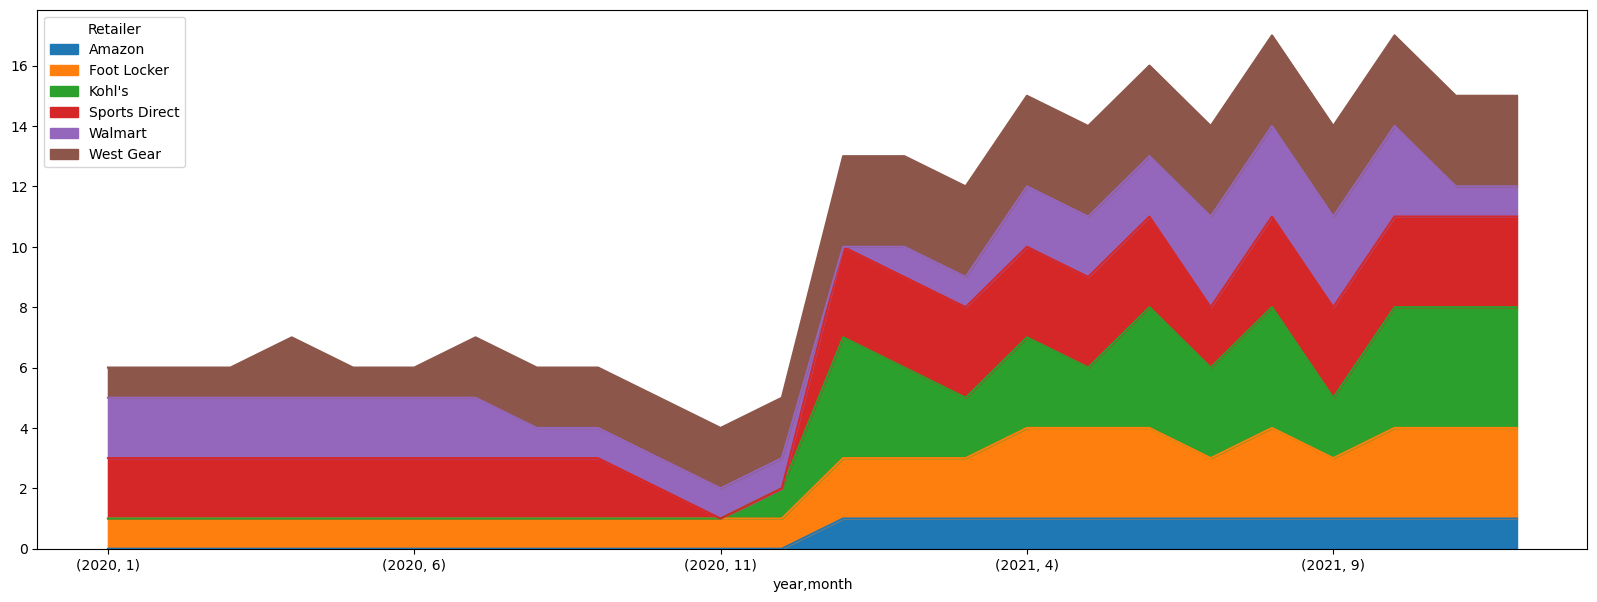

In [96]:
# 2020년 12월과 2021년 1월 사이에 판매량 급증 하였다. 
# https://www.hankyung.com/article/202109174555g
# 코로나19 장기화 속 레깅스 기업 '대박'
df.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Retailer ID', aggfunc = 'count').plot(kind = "area", figsize=(20,7))

# 데이터 분석 - 마진율 분석

In [97]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Profit_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5,2020,1
1,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.3,2020,2


In [98]:
# 판매량에 따른 마진율도 증가

adidas.groupby('year').agg({'Operating Profit_rate' : 'mean'})

,Operating Profit_rate
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

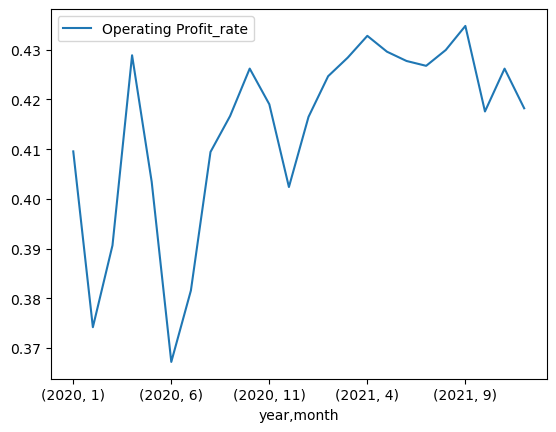

In [99]:
adidas.pivot_table(index = ['year', 'month'], values = 'Operating Profit_rate', aggfunc = 'mean').plot()

<Axes: xlabel='year,month'>

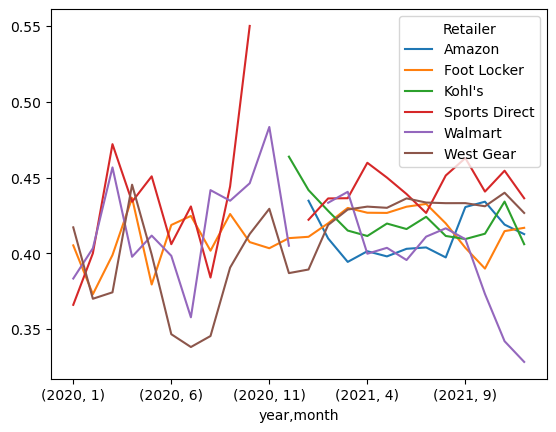

In [100]:
# West Gear, Walmart 두개 소매점이 마진율이 낮다. 
adidas.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Operating Profit_rate', aggfunc = 'mean').plot.line()

## 판매방법에 따른 마진율/판매단가

In [101]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

<Axes: xlabel='year,month'>

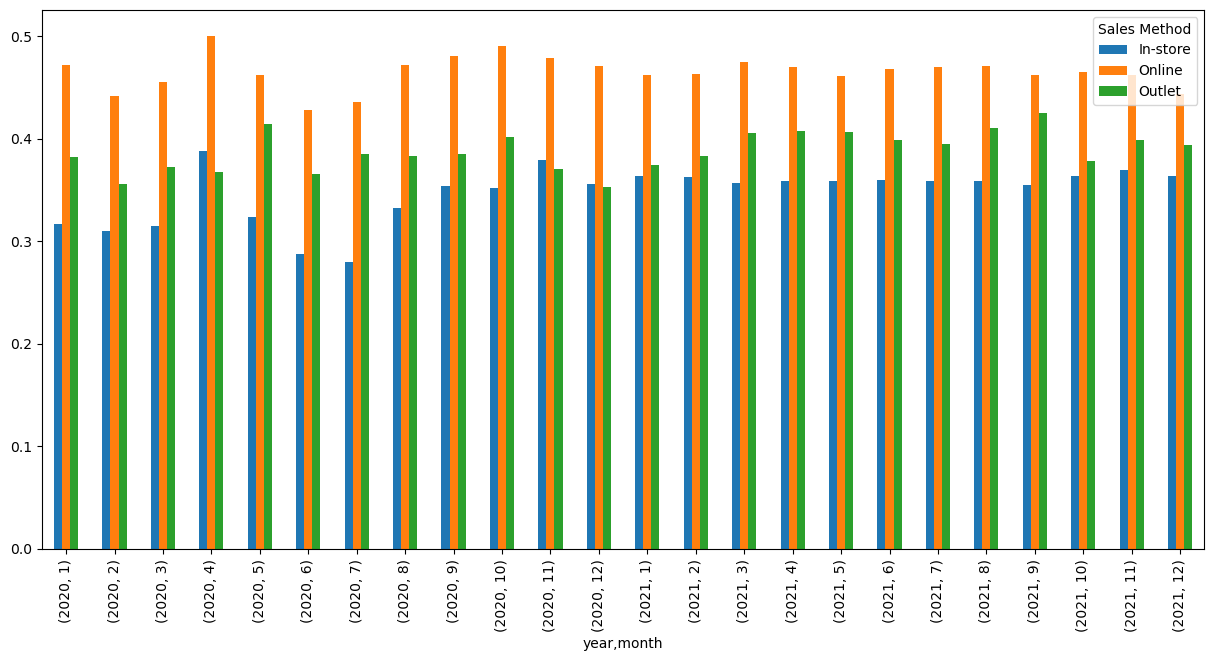

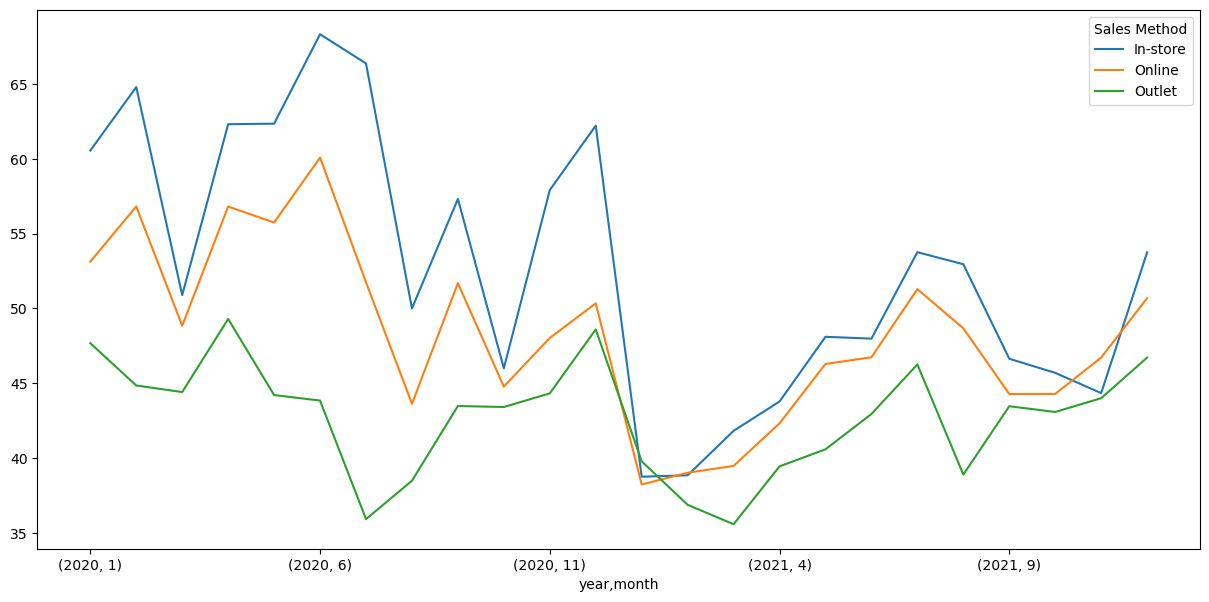

In [102]:
# 마진율은 온라인 > 아울렛 > 오프라인 순
adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Operating Profit_rate', aggfunc = 'mean').plot(kind = 'bar', figsize = (15,7))

# 판매단가는 오프라인 > 온라인 > 아울렛 순
adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Price per Unit', aggfunc = 'mean').plot(kind = 'line', figsize = (15, 7))


## 온라인은 매장 임대료가 없기 때문에 마진율이 높다.
## 아울렛은 재고를 빨리 소진하기 위해 마진율이 낮다.
## 오프라인은 매장 임대료가 있기 때문에 마진율이 낮다.

## 판매방법에 따라 판매성과에 차이가 있을 것인가 ?

1. 일원배치 분산분석을 이용한 통계적 검증
2. boxplot을 이용한 시각화

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

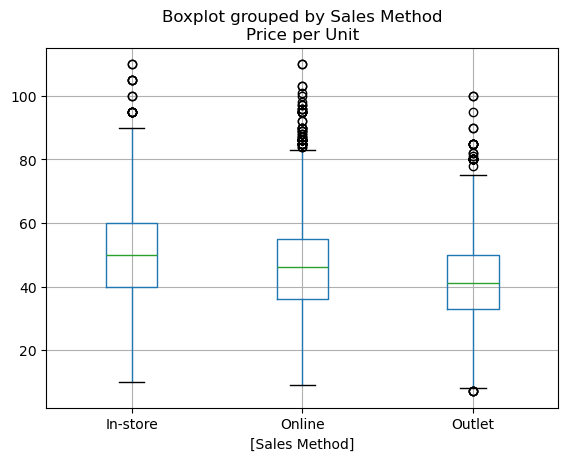

In [103]:
# 판매방법에 따른 판매가격 이상치 검증

adidas[['Sales Method', 'Price per Unit']].boxplot(by = 'Sales Method')

<Axes: title={'center': 'Operating Profit_rate'}, xlabel='[Sales Method]'>

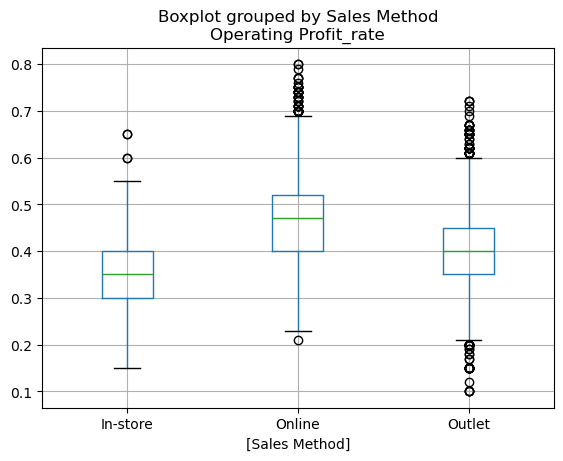

In [104]:
# 판매방법에 따른 마진율 검증
## 위에 단가랑은 다르게 오프라인이 마진율이 낮다.

adidas[['Sales Method', 'Operating Profit_rate']].boxplot(by = 'Sales Method')

In [107]:
from scipy import stats
import statsmodels.stats.multicomp as mc

# 일원배치 ANOVA
groups = [g["Price per Unit"].values for _ , g in adidas.groupby("Sales Method")]
f_stat, p_val = stats.f_oneway(*groups)
print(f"F={f_stat:.2f}, p={p_val:.4g}")

# 사후검정
comp = mc.MultiComparison(adidas["Price per Unit"], adidas["Sales Method"])
print(comp.tukeyhsd().summary())

F=131.81, p=3.339e-57
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
In-store Online  -2.9128   0.0 -3.8623 -1.9634   True
In-store Outlet  -6.7859   0.0 -7.8097 -5.7622   True
  Online Outlet  -3.8731   0.0 -4.6604 -3.0858   True
-----------------------------------------------------


In [ ]:
print(adidas.columns.tolist())

['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method', 'Operating Profit_rate', 'year', 'month']


# 분석 정리

### 단가 차이
- 판매방법에 따라 단가 평균에 유의미한 차이가 있다.  
- 순서: **매장 > 온라인 > 아울렛**
- 즉, 매장 판매 상품의 객단가가 가장 높고, 다음은 온라인, 마지막은 아울렛이다.
- (박스플롯 + ANOVA 검증 결과 통계적으로 유의)

### 아울렛 한계
- 아울렛은 매장·온라인에서 판매되지 않는 상품이 주로 판매됨.
- 따라서 단순 비교대상으로는 한계가 있음.

### 마진율 차이
- 판매방법에 따라 마진율에도 유의미한 차이가 있다.
- 순서: **온라인 > 아울렛 > 매장**

# 결과 요약

- **온라인**: 단가 낮은 상품이 많이 팔리지만, 마진율은 높음.
- **매장**: 단가 높은 상품이 많이 팔리지만, 마진율은 낮음.